<a href="https://colab.research.google.com/github/asyariiif/chatbotPSHBNeuralNetwork/blob/main/Copy_of_notebookf70983df77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
import tensorflow as tf


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/drive/My Drive/Advance AI/fine-tunning.csv')
data['Text'] = data['Text'].astype(str)
texts = data['Text'].values
labels = data['Sentiment'].values

In [7]:
!pip install Sastrawi
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re

stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()
custom_stopwords = ['aku', 'yg', 'kamu']
stopwords += custom_stopwords

pattern = r"[^A-Za-z ]"

lemmatizer = WordNetLemmatizer()

for index, text in enumerate(texts):
    text = text.lower()

    text = re.sub(pattern, '', text)

    word_list = word_tokenize(text)
    word_list = [word for word in word_list if word not in stopwords]

    word_list = [lemmatizer.lemmatize(word) for word in word_list]

    text = ' '.join(word_list)
    texts[index] = text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


Unique labels after preprocessing: ['positive' 'negative']


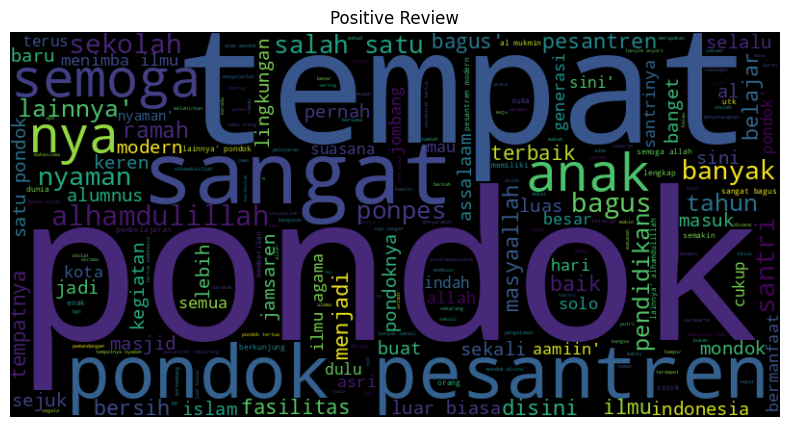

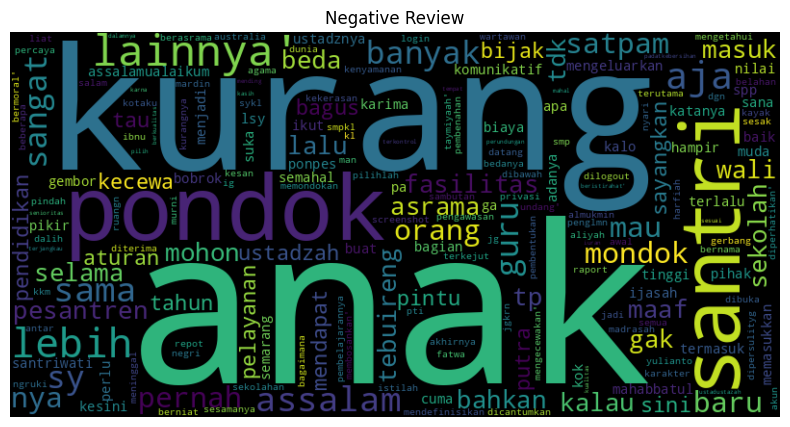

In [8]:
# %%
def generate_wordcloud(text,Title):
    all_text = "".join(str(text))
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

# Add this line to inspect the unique labels after preprocessing
print("Unique labels after preprocessing:", pd.Series(labels).unique())

positive = texts[labels=='positive'].tolist()

# Add a check to see if the positive list is empty before generating the wordcloud
if positive:
    generate_wordcloud(positive,'Positive Review')
else:
    print("No positive sentiments found after preprocessing.")

negative = texts[labels=='negative'].tolist()

# Add a check to see if the negative list is empty before generating the wordcloud
if negative:
    generate_wordcloud(negative,'Negative Review')
else:
    print("No negative sentiments found after preprocessing.")

In [9]:
train_texts, tests_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

In [10]:
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts,padding=True,truncation=True, return_tensors='tf', max_length=512)

train_encodings = tokenize_function(train_texts.tolist())
test_encodings = tokenize_function(tests_texts.tolist())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [12]:
import torch
from transformers import TFBertForSequenceClassification, get_linear_schedule_with_warmup
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from torch.optim import AdamW # Import AdamW from torch.optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = TFBertForSequenceClassification.from_pretrained('indolem/indobert-base-uncased', num_labels=2, from_pt=True)

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110558208 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 110559746 (421.75 MB)
Trainable params: 110559746 (421.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        layer.rate = 0.2


In [15]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f"Layer: {layer.name}, Dropout rate: {layer.rate}")

Layer: dropout_37, Dropout rate: 0.2


In [16]:
epochs = 3
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [17]:
history = model.fit(
    [train_encodings['input_ids'], train_encodings['token_type_ids'], train_encodings['attention_mask']],
    train_labels, validation_split = 0.1,
    batch_size=16,
    epochs=epochs
)

Epoch 1/3
50/50 [==============================] - 663s 12s/step - loss: 0.1896 - accuracy: 0.9521 - val_loss: 0.1034 - val_accuracy: 0.9775
Epoch 2/3
50/50 [==============================] - 590s 12s/step - loss: 0.1530 - accuracy: 0.9610 - val_loss: 0.0907 - val_accuracy: 0.9775
Epoch 3/3
50/50 [==============================] - 663s 13s/step - loss: 0.1311 - accuracy: 0.9635 - val_loss: 0.1030 - val_accuracy: 0.9775


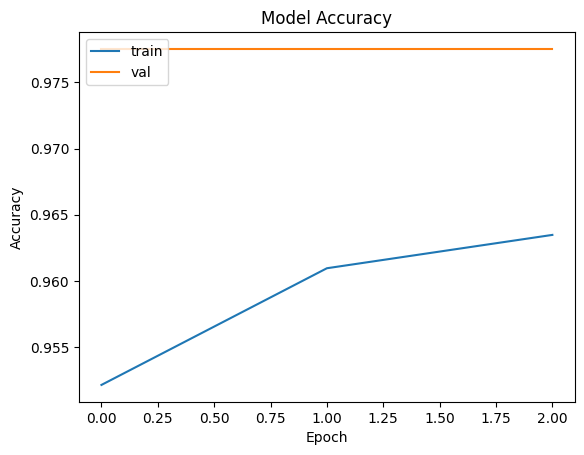

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
pred = model.predict([test_encodings['input_ids'], test_encodings['token_type_ids'], test_encodings['attention_mask']])
pred_labels = tf.argmax(pred.logits, axis=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_labels, test_labels))


7/7 [==============================] - 61s 8s/step
0.9638009049773756


In [20]:
model.save_pretrained('sentiment_model')
tokenizer.save_pretrained('sentiment_model')

('sentiment_model/tokenizer_config.json',
 'sentiment_model/special_tokens_map.json',
 'sentiment_model/vocab.txt',
 'sentiment_model/added_tokens.json')

In [21]:
model = TFBertForSequenceClassification.from_pretrained('sentiment_model')
tokenizer = BertTokenizer.from_pretrained('sentiment_model')


Some layers from the model checkpoint at sentiment_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at sentiment_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [22]:
labels = ['negative', 'positive']
def predict_sentiment(text):
    encoding = tokenize_function(text)
    pred = model.predict([encoding['input_ids'], encoding['token_type_ids'], encoding['attention_mask']])
    pred_labels = tf.argmax(pred.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [labels[i] for i in pred_labels.numpy().tolist()]
    print(pred_labels)

predict_sentiment("huhiapa yang setan aku tak tahu apapun alasannya aku tak ingin tahu perasaan pembunuh kogoro mouri")


1/1 [==============================] - 4s 4s/step
['positive']


In [ ]:
pilkada = pd.read_csv('/content/drive/My Drive/Advance AI/hasil_indobertbase - hasil_indobertbase.csv')
x = tokenize_function(pilkada['text'].tolist())
y = pilkada['sentiment']
y = le.fit_transform(y)
pred = model.predict([x['input_ids'], x['token_type_ids'], x['attention_mask']])
pred_labels = tf.argmax(pred.logits, axis=1)
pred_labels
from sklearn.metrics import accuracy_score
print(accuracy_score(pred_labels, y))

177/270 [==================>...........] - ETA: 42:35